In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
data = pd.read_csv('./output/submission/lgbm_blended_2.csv')
best = data.target.values

In [7]:
best

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [26]:
preds = []
paths=['./output/submission/lgbm_800.csv',
       './output/submission/lgbm_blended_2.csv',
       './output/class/nxt_1.csv',
       './output/class/nxt_2.csv',
       './output/class/nxt_3.csv',
       './output/class/nxt_4.csv',
       './output/class/nxt_5.csv',
       './output/class/nxt_blend_1.csv',
       './output/class/nxt_blend_2.csv',
       './output/class/nxt_blend_3.csv',
       './output/class/nxt_blend_4.csv',
       './output/class/nxt_blend_5.csv',
       './output/class/nxt_blend2_1.csv',
       './output/class/nxt_blend2_2.csv',
       './output/class/nxt_blend2_3.csv',
       './output/class/nxt_blend2_4.csv',
       './output/class/nxt_blend2_5.csv',
       './output/class/nxt_two_bland_1.csv',
       './output/class/nxt_two_bland_2.csv',
       './output/class/nxt_two_bland_3.csv',
       './output/class/nxt_two_bland_4.csv',
       './output/class/nxt_two_bland_5.csv',
      ]
for path in paths:
    data = pd.read_csv(path)
    data = data.target.values
    preds.append(data)
    

In [27]:
covs=[]
for path, pred in zip(paths,preds):
    x=np.cov(best,pred)[0,1]
    covs.append(x)
    print(path,'cov:',x)

./output/submission/lgbm_800.csv cov: 0.1863924068917785
./output/submission/lgbm_blended_2.csv cov: 0.19233553988196994
./output/class/nxt_1.csv cov: 0.18916205510308348
./output/class/nxt_2.csv cov: 0.18916205510308348
./output/class/nxt_3.csv cov: 0.18860976253744266
./output/class/nxt_4.csv cov: 0.18860976253744266
./output/class/nxt_5.csv cov: 0.18729574502259239
./output/class/nxt_blend_1.csv cov: 0.1905754750769544
./output/class/nxt_blend_2.csv cov: 0.1905754750769544
./output/class/nxt_blend_3.csv cov: 0.19017777532095673
./output/class/nxt_blend_4.csv cov: 0.19017777532095673
./output/class/nxt_blend_5.csv cov: 0.18897418124156384
./output/class/nxt_blend2_1.csv cov: 0.18941814167747895
./output/class/nxt_blend2_2.csv cov: 0.18941814167747895
./output/class/nxt_blend2_3.csv cov: 0.18903594910037824
./output/class/nxt_blend2_4.csv cov: 0.18903594910037824
./output/class/nxt_blend2_5.csv cov: 0.18798037032243614
./output/class/nxt_two_bland_1.csv cov: 0.1905444607191579
./outpu

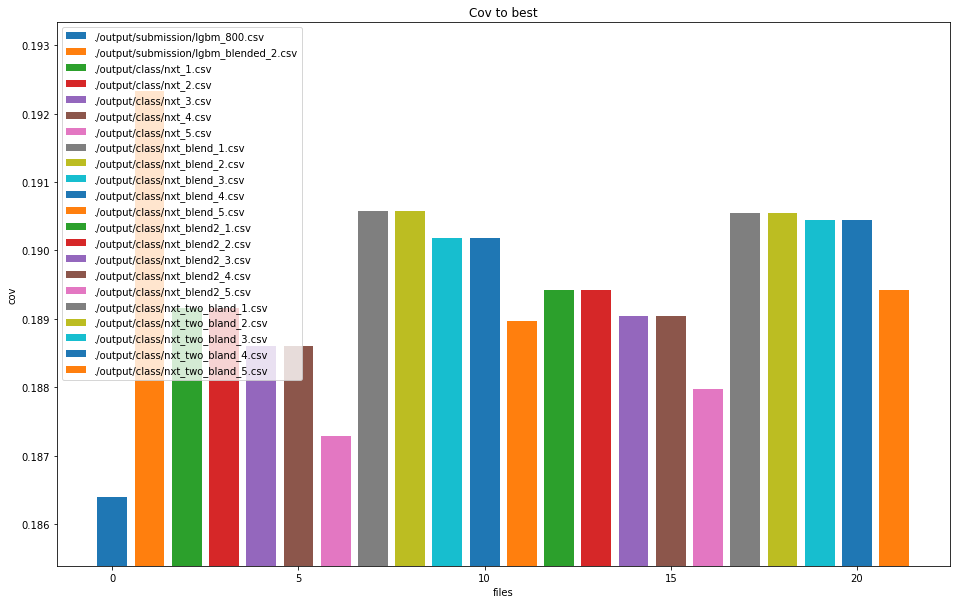

In [28]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)


# Plot
for i in range(len(preds)):
    ax.bar(x=i,height=covs[i],label=paths[i])
    
ax.set_ylim(min(covs)-0.001,max(covs)+0.001)
ax.set(xlabel='files', ylabel='cov',
       title='Cov to best')
ax.legend(loc="upper left", markerscale=2, scatterpoints=1, fontsize=10)
plt.show()